## [TODO] :
> error: OpenCV(4.1.1) /home/nvidia/host/build_opencv/nv_opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from typing import (List, Dict)
from _path import (get_cut_dir, stop_if_none)


# functions : for a few initial path setting



In [2]:
dir_dnn = get_cut_dir('drowsiness_detect') + 'src_dnn/'
dir_img = get_cut_dir('drowsiness_detect') + 'src_image/'

cascade_face = cv2.CascadeClassifier(dir_dnn + 'haarcascade_frontalface_default.xml')
cascade_eye = cv2.CascadeClassifier(dir_dnn + 'haarcascade_eye.xml')
cascade_smile = cv2.CascadeClassifier(dir_dnn + 'haarcascade_smile.xml')

In [3]:
def getGray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def getRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def getBGR(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

In [4]:
def detect_eye(img_RGB:object) -> object:
    """# eyd detection & return rectangular marks"""
    img_gray =  getGray(img_RGB)
    
    eyes = cascade_eye.detectMultiScale(
                    image=img_gray,
                    scaleFactor=1.2,
                    minNeighbors=18,
                )

    for (x_eye, y_eye, w_eye, h_eye) in eyes:
        cv2.rectangle(
                    img=img_RGB,
                    pt1=(x_eye, y_eye),
                    pt2=(x_eye+w_eye, y_eye+h_eye),
                    color=(0, 180, 60),     # BGR <-- rgb(60, 180, 0)
                    thickness=2,
                )
    return img_RGB

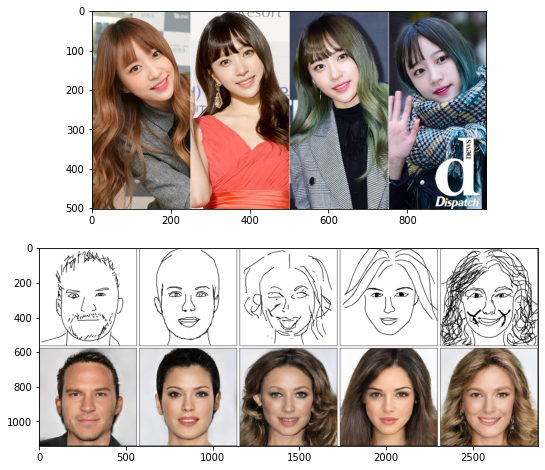

In [5]:
fig, axes = plt.subplots(2,1, figsize=(10,8))

image_plt1 = plt.imread(dir_img + 'hani_leaned_faces.jpg')
image_plt2 = plt.imread(dir_img + 'dnn_face_doodles.jpg')

axes[0].imshow(image_plt1)
axes[1].imshow(image_plt2)
plt.show()

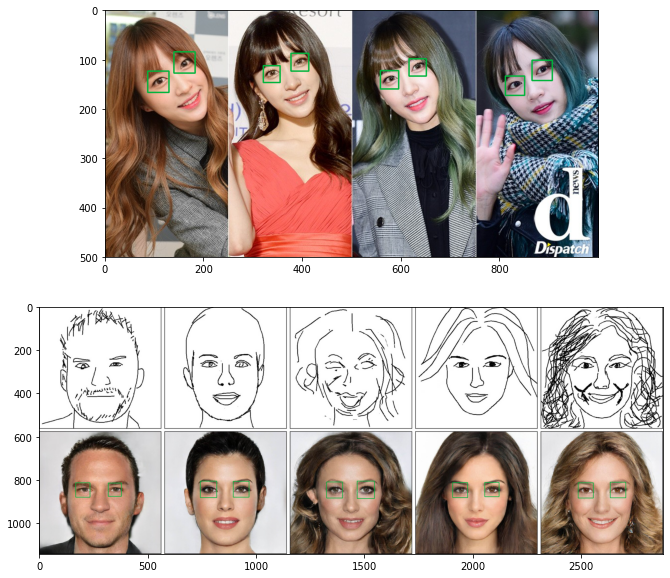

In [6]:
img1 = detect_eye(image_plt1)
img2 = detect_eye(image_plt2)

fig, axes = plt.subplots(2,1,figsize=(13,10))
axes[0].imshow(img1)
axes[1].imshow(img2)

In [16]:
# TO PRESS ANY KEY TO CLOSE WINDOW

win_name = 'Eye Detection'
cv2.imshow(win_name, getRGB(img1))
cv2.moveWindow(win_name, 0, 0)       # move to (0,0)
c = cv2.waitKey()
print('Press =', c , chr(c))
cv2.destroyAllWindows()

Press = 27 
